In [17]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


start_date = '2018-01-01'
eth = yf.download('ETH-USD',start_date)

pd.DataFrame.to_csv(eth)

training_data = eth.iloc[:, 0:2]

# mpf.plot(eth_df, type='candle', style='charles', title='Ethereum (ETH) Price', volume=True, figsize=(14,7))


# Data Normalization
# Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.
sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(training_data_df)

print(training_set_scaled)

X_train = []
y_train = []

for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


real_price = eth.iloc[:, 0:2].values

[*********************100%***********************]  1 of 1 completed
[[0.1420878  0.1450551 ]
 [0.14559811 0.17258111]
 [0.16964783 0.18498987]
 ...
 [0.32950389 0.32553644]
 [0.32818234 0.32252466]
 [0.32981701 0.32545956]]


In [14]:
dataset_total = pd.concat((eth['Open'], ['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    x
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

NameError: name 'predicted_price' is not defined

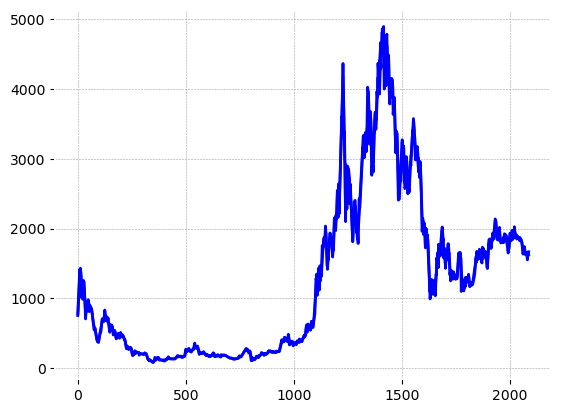

In [37]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)


plt.plot(real_stock_price, color = 'blue', label = 'ETH Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted ETH Price')
plt.title('ETH Price Prediction')
plt.xlabel('Time')
plt.ylabel('ETH Price')
plt.legend()
plt.show()

NameError: name 'yf' is not defined